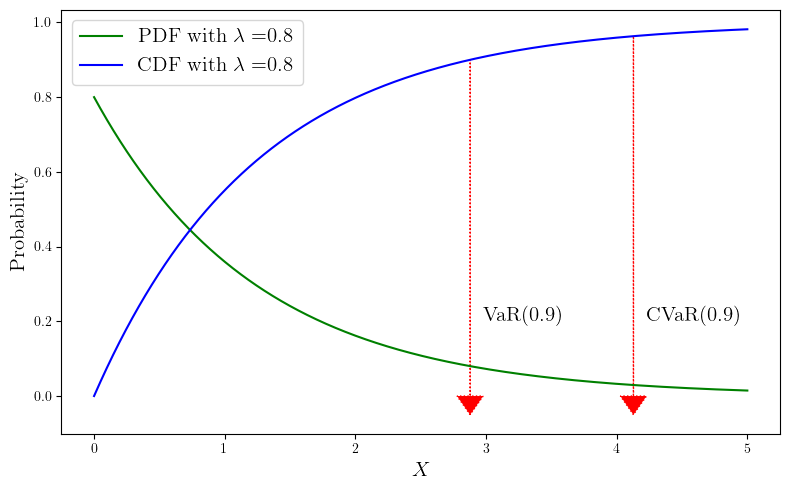

In [3]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting results
import scipy.stats as stat  # For statistical functions (PDF, CDF)
from matplotlib import rc  # For configuring LaTeX rendering in plots
from scipy.optimize import linprog  # Linear programming (not used in this script)
from pyomo.environ import *  # Pyomo for optimization (not used in this script)

# Enable LaTeX rendering for better mathematical formatting in plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')  # Set the font to serif for better appearance

#### Step 1: Define the exponential distribution and compute VaR and CVaR analytically ####

# Define parameters for the exponential distribution
lbd = 0.8  # Rate parameter (lambda) of the exponential distribution
# Set confidence level for VaR and CVaR calculations
alpha = 0.90  # 90% confidence level

# Compute Value at Risk (VaR) analytically
var = -np.log(1 - alpha) / lbd  # Formula for VaR(alpha) for an exponential distribution

# Compute Conditional Value at Risk (CVaR) analytically
cvar = (1 - np.log(1 - alpha)) / lbd  # Formula for CVaR(alpha) for an exponential distribution


#### Step 2: Compute the PDF and CDF of the exponential distribution ####

nsize = 100000  # Number of points for numerical evaluation
xx = np.linspace(0, 5, nsize)  # Generate a range of values from 0 to 8

# Compute the probability density function (PDF) and cumulative distribution function (CDF)
pdf = stat.expon.pdf(xx, scale=1/lbd)  # Compute the PDF of an exponential distribution
cdf = stat.expon.cdf(xx, scale=1/lbd)  # Compute the CDF of an exponential distribution


#### Step 3: Plot the PDF and CDF of the exponential distribution with VaR and CVaR ####

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))  # Define figure size

# Plot the PDF (Probability Density Function)
plt.plot(xx, pdf, 'g', label=r'PDF with $\lambda =$' + str(lbd))  

# Plot the CDF (Cumulative Distribution Function)
plt.plot(xx, cdf, '-b', label=r'CDF with $\lambda =$' + str(lbd))

# Annotate VaR with an arrow pointing to its position on the CDF
plt.arrow(var, stat.expon.cdf(var, scale=1/lbd), 0, 
          -stat.expon.cdf(var, scale=1/lbd) - 0.05, color='red', length_includes_head=True, 
          head_width=0.2, head_length=0.05, linestyle=':')
plt.text(var + 0.1, 0.2, 'VaR(' + str(alpha) + ')', fontsize=15)  # Label the VaR value

# Annotate CVaR with an arrow pointing to its position on the CDF
plt.arrow(cvar, stat.expon.cdf(cvar, scale=1/lbd), 0, 
          -stat.expon.cdf(cvar, scale=1/lbd) - 0.05, color='red', length_includes_head=True, 
          head_width=0.2, head_length=0.05, linestyle=':')
plt.text(cvar + 0.1, 0.2, 'CVaR(' + str(alpha) + ')', fontsize=15)  # Label the CVaR value

# Set axis labels
ax.set_ylabel('Probability', fontsize=15)
ax.set_xlabel(r'$X$', fontsize=15)

# Display legend
ax.legend(fontsize=15)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()
